In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid', {'grid.linestyle': '--'})

In [8]:
from sklearn.datasets import make_blobs
# ダミーデータを生成することができる

In [9]:
X , y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)
# 中心点centers 乱数random state  標準偏差 cluster std

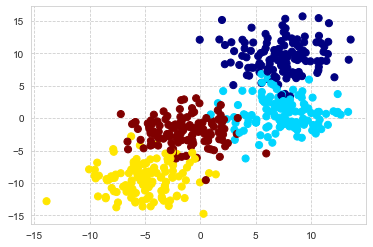

In [11]:
plt.plot(figsize= (20,20))
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='jet')

In [12]:
from sklearn.tree import DecisionTreeClassifier

/Users/fujiiryou/.pyenv/versions/3.7.4/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

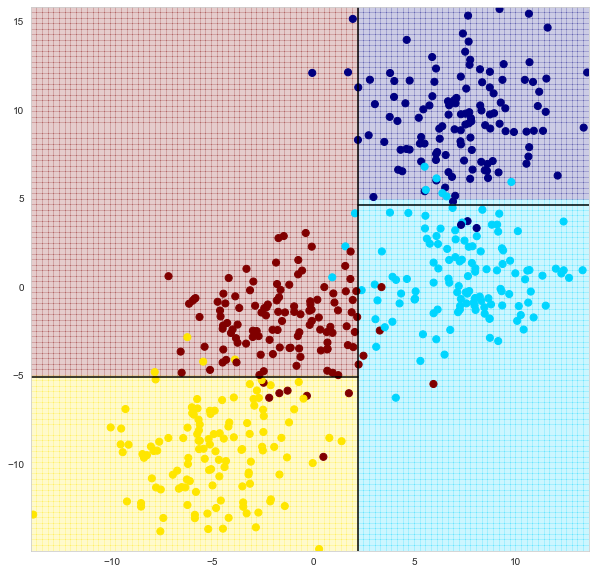

In [16]:
# モデルを作ります。
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

# 描画します。
visualize_tree(clf,X,y)

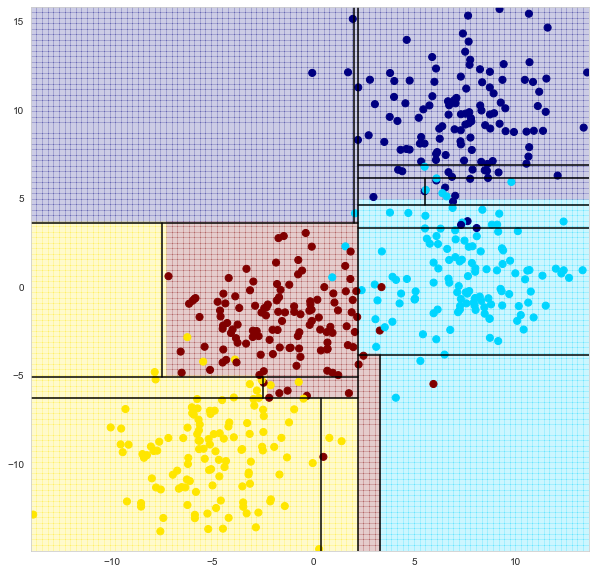

In [17]:
# モデルを作ります。
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

# 描画します。
visualize_tree(clf,X,y)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf =RandomForestClassifier(n_estimators=100, random_state=0)

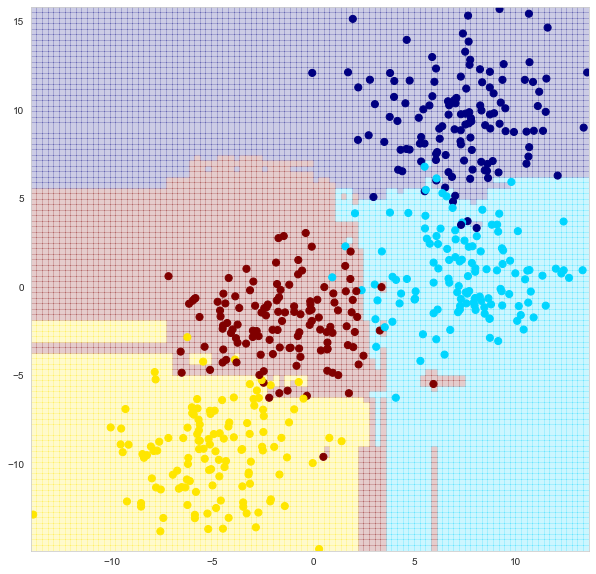

In [21]:
visualize_tree(clf , X, y, boundaries=False)

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Regressor とは回帰

<ErrorbarContainer object of 3 artists>

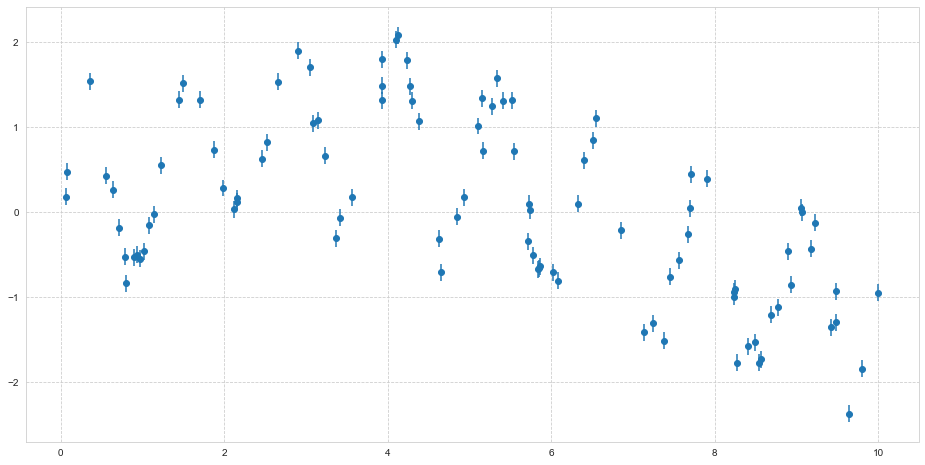

In [23]:
x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    大きな波＋小さな波＋ノイズからなるダミーデータです。
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# xからyを計算
y = sin_model(x)

# Plotします。
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

In [24]:
xfit = np.linspace(0, 10, 1000)

In [26]:
rfr = RandomForestRegressor(100)

In [27]:
rfr.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
yfit = rfr.predict(xfit[:,None])

In [29]:
yfit


array([ 0.29820728,  0.29820728,  0.29820728,  0.29820728,  0.29820728,
        0.29820728,  0.29820728,  0.29820728,  0.42459047,  0.42459047,
        0.42459047,  0.42459047,  0.42459047,  0.42459047,  0.42459047,
        0.42459047,  0.42459047,  0.42459047,  0.42459047,  0.42459047,
        0.42459047,  0.42459047,  1.09764406,  1.09764406,  1.09764406,
        1.09764406,  1.09764406,  1.09764406,  1.09764406,  1.09764406,
        1.09764406,  1.11494234,  1.10932681,  1.10932681,  1.10932681,
        1.10932681,  1.09160298,  1.09160298,  1.09160298,  1.09160298,
        1.09160298,  1.09160298,  1.09160298,  1.09160298,  1.08156002,
        1.08156002,  0.62529524,  0.62529524,  0.62529524,  0.62529524,
        0.47162211,  0.47162211,  0.47162211,  0.47162211,  0.40263644,
        0.40263644,  0.40263644,  0.40263644,  0.31982279,  0.31982279,
        0.24936001,  0.24936001,  0.24936001,  0.22859859,  0.14906449,
        0.14906449,  0.14906449,  0.07246448, -0.13118006, -0.13

In [ ]:
ytrue = sin_model(xfit,0)
plt.figure(figsize=(16,8))
plt.errorbar(x,y,0.1,fmt = '-')
pl